In [138]:
# %run featuregeneration.ipynb

In [139]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [206]:

X_train_reshaped = X_train.reshape(X_train.shape[0], -1)  # Reshape to (samples, timesteps * features)
X_val_reshaped = X_val.reshape(X_val.shape[0], -1)
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)

In [210]:
print(X_train_reshaped.shape)
print(y_train.shape)
print(X_val_reshaped.shape)
print(y_val.shape)
print(X_test_reshaped.shape)
print(y_test.shape)

(24520, 456)
(24520,)
(6988, 456)
(6988,)
(3482, 456)
(3482, 1)


# Bagging 

In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define the range of parameters to test
# n_estimators_options = [50, 100, 150]  # Number of base estimators to create
# max_features_options = [0.5, 0.7, 1.0] # Proportion of features to draw from the dataset
# max_samples_options = [0.5, 0.7, 1.0]  # Proportion of samples to draw from the dataset
n_estimators_options = [50]  # Number of base estimators to create
max_features_options = [1.0] # Proportion of features to draw from the dataset
max_samples_options = [1.0]  # Proportion of samples to draw from the dataset

# Variables to store the best combination and the lowest error
best_n_estimators = None
best_max_features = None
best_max_samples = None
best_mse = float("inf")

# Loop over all combinations of parameters
for n_estimators in n_estimators_options:
    for max_features in max_features_options:
        for max_samples in max_samples_options:
            # Initialize the model with the current combination of parameters
            bagging_model = BaggingRegressor(
                estimator=DecisionTreeRegressor(),
                n_estimators=n_estimators,
                max_features=max_features,
                max_samples=max_samples,
                random_state=101
            )
            
            # Fit the model on the training set
            bagging_model.fit(X_train_reshaped, y_train)
            
            # Predict on the validation set
            y_val_pred = bagging_model.predict(X_val_reshaped)
            
            # Calculate the mean squared error for validation
            mse = mean_squared_error(y_val, y_val_pred)
            
            # Update the best parameters if current mse is lower
            if mse < best_mse:
                best_mse = mse
                best_n_estimators = n_estimators
                best_max_features = max_features
                best_max_samples = max_samples

# Output the best combination and the corresponding MSE
print(f"Best Parameters:")
print(f"n_estimators: {best_n_estimators}")
print(f"max_features: {best_max_features}")
print(f"max_samples: {best_max_samples}")
print(f"Mean Squared Error: {best_mse:.4f}")

# Predict on the test set with the best model found
y_test_pred = bagging_model.predict(X_test_reshaped)

# Evaluate the model performance on the test set
mse = mean_squared_error(y_test, y_test_pred)
mae = mean_absolute_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print(f"R² Score: {r2:.4f}")


Best Parameters:
n_estimators: 50
max_features: 1.0
max_samples: 1.0
Mean Squared Error: 0.0007
Mean Absolute Error (MAE): 0.016383272235342753
Mean Squared Error (MSE): 0.0004908024713942617
R² Score: 0.9292


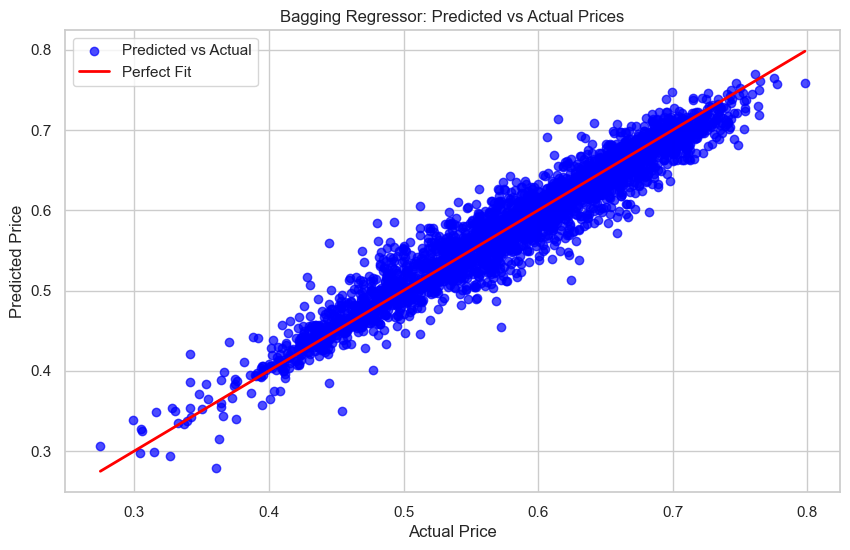

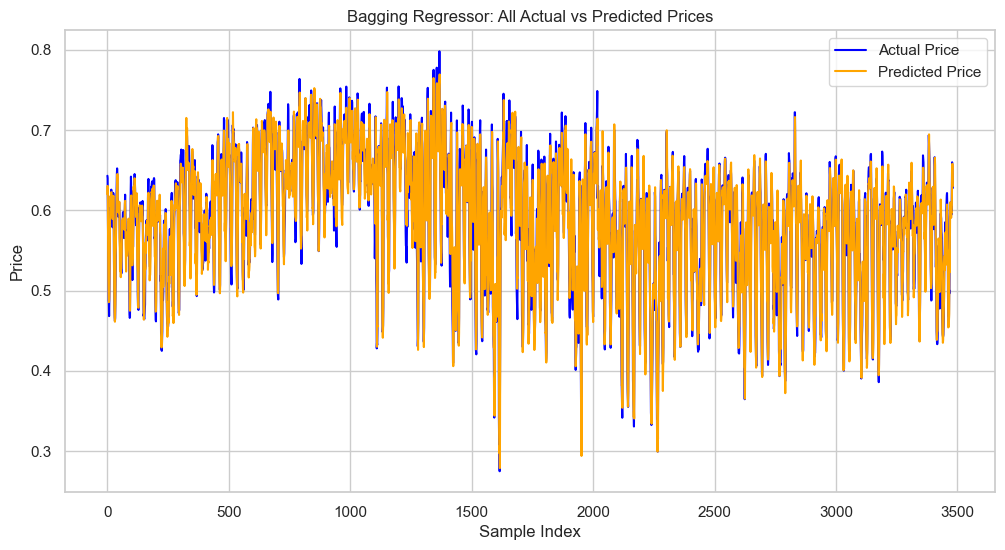

In [235]:
import matplotlib.pyplot as plt

# Assuming y_test and y_test_pred contain all actual and predicted prices for the test set

# Scatter Plot of Prediction vs Actual Price
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.7, label="Predicted vs Actual", color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", lw=2, label="Perfect Fit")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Bagging Regressor: Predicted vs Actual Prices")
plt.legend()
plt.show()

# Line Plot of All Actual vs Predicted Prices without markers
plt.figure(figsize=(12, 6))
plt.plot(y_test, linestyle='-', label="Actual Price", color="blue")
plt.plot(y_test_pred, linestyle='-', label="Predicted Price", color="orange")
plt.xlabel("Sample Index")
plt.ylabel("Price")
plt.title("Bagging Regressor: All Actual vs Predicted Prices")
plt.legend()
plt.show()



# Bagging w/ DecisionTreeRegressor

In [209]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Parameters for the Bagging Regressor
n_estimators = 100  # Number of base estimators
max_features = 0.7  # Fraction of features to use
max_samples = 0.7   # Fraction of samples to use

# Initialize the Bagging Regressor with the specified parameters
bagging_model = BaggingRegressor(
    estimator=DecisionTreeRegressor(),
    n_estimators=n_estimators,
    max_features=max_features,
    max_samples=max_samples,
    random_state=101
)

# Fit the model on the reshaped training data
bagging_model.fit(X_train_reshaped, y_train)

# Predict on the reshaped validation set
y_val_pred = bagging_model.predict(X_val_reshaped)

# Predict on the reshaped test set
y_test_pred = bagging_model.predict(X_test_reshaped)

# Evaluate the model performance on the validation set
val_mae = mean_absolute_error(y_val, y_val_pred)
val_mse = mean_squared_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

# Evaluate the model performance on the test set
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Output the evaluation metrics for validation and test sets
print("Validation Set Performance:")
print("Mean Absolute Error (MAE):", val_mae)
print("Mean Squared Error (MSE):", val_mse)
print(f"R² Score: {val_r2:.4f}")

print("\nTest Set Performance:")
print("Mean Absolute Error (MAE):", test_mae)
print("Mean Squared Error (MSE):", test_mse)
print(f"R² Score: {test_r2:.4f}")


Validation Set Performance:
Mean Absolute Error (MAE): 0.020293803541727835
Mean Squared Error (MSE): 0.0008521678368004586
R² Score: 0.9434

Test Set Performance:
Mean Absolute Error (MAE): 0.01808796112404908
Mean Squared Error (MSE): 0.0005835125413394003
R² Score: 0.9158


# Ada Boost


In [213]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the AdaBoost Regressor with a Decision Tree as the base estimator
ada_boost_model = AdaBoostRegressor(
    estimator=DecisionTreeRegressor(max_depth=4),  # Use shallow trees as weak learners
    n_estimators=100,  # Number of boosting rounds
    learning_rate=0.1,  # Learning rate controls contribution of each estimator
    random_state=101
)

# Train the AdaBoost model on the reshaped training data
ada_boost_model.fit(X_train_reshaped, y_train)

# Make predictions on the reshaped test set
y_pred = ada_boost_model.predict(X_test_reshaped)

# Evaluate the model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output the evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print(f"R² Score: {r2:.4f}")


Mean Absolute Error (MAE): 0.019718642990803833
Mean Squared Error (MSE): 0.0006971031425126137
R² Score: 0.8994


# XG Boost


=== Early Stopping ===
Training stopped at 325 rounds
Best iteration was at 274

=== Model Configuration ===
n_estimators: 1000
learning_rate: 0.1
max_depth: 6

=== Evaluation Metrics ===
MAE: 0.0155
MSE: 0.0004
RMSE: 0.0206
R²: 0.9389


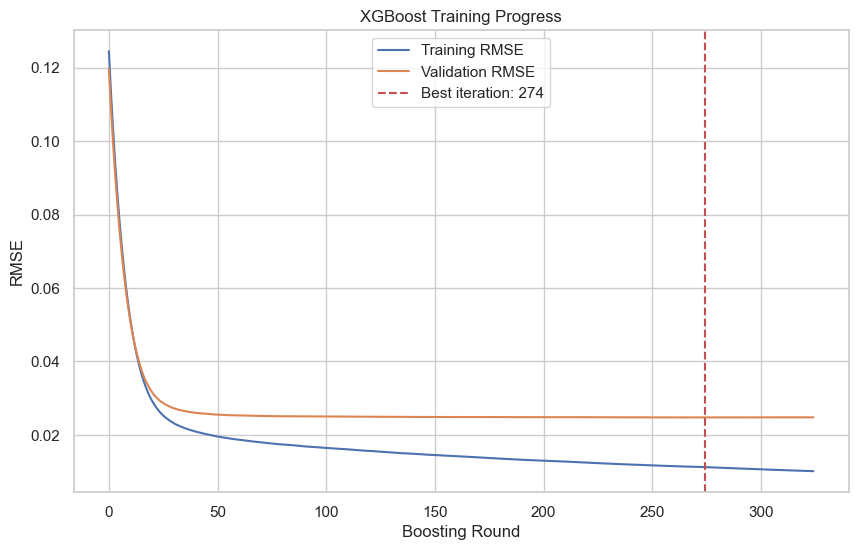

In [240]:
import xgboost as xgb
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Configure key parameters
n_estimators = 1000
learning_rate = 0.1
max_depth = 6

# Initialize the regressor
xgb = xgb.XGBRegressor(
    n_estimators=n_estimators,
    learning_rate=learning_rate,
    max_depth=max_depth,
    random_state=42,
    early_stopping_rounds=50
)

# Train with early stopping
xgb.fit(
    X_train_reshaped, y_train,
    eval_set=[(X_train_reshaped, y_train), (X_val_reshaped, y_val)],
    verbose=False
)

# Check if early stopping was triggered
results = xgb.evals_result()
actual_rounds = len(results['validation_0']['rmse'])
if actual_rounds < n_estimators:
    print(f"\n=== Early Stopping ===")
    print(f"Training stopped at {actual_rounds} rounds")
    print(f"Best iteration was at {xgb.best_iteration}")
else:
    print("\nTraining completed all {n_estimators} rounds")

# Make predictions
predictions = xgb.predict(X_test_reshaped)

# Calculate metrics
metrics = {
    'MAE': mean_absolute_error(y_test, predictions),
    'MSE': mean_squared_error(y_test, predictions),
    'RMSE': np.sqrt(mean_squared_error(y_test, predictions)),
    'R²': r2_score(y_test, predictions)
}

print("\n=== Model Configuration ===")
print(f"n_estimators: {n_estimators}")
print(f"learning_rate: {learning_rate}")
print(f"max_depth: {max_depth}")

print("\n=== Evaluation Metrics ===")
for metric_name, value in metrics.items():
    print(f"{metric_name}: {value:.4f}")

# Plot training curves
results = xgb.evals_result()
train_rmse = results['validation_0']['rmse']
val_rmse = results['validation_1']['rmse']

plt.figure(figsize=(10, 6))
plt.plot(train_rmse, label='Training RMSE')
plt.plot(val_rmse, label='Validation RMSE')
plt.axvline(x=xgb.best_iteration, color='r', linestyle='--', 
            label=f'Best iteration: {xgb.best_iteration}')
plt.legend()
plt.xlabel('Boosting Round')
plt.ylabel('RMSE')
plt.title('XGBoost Training Progress')
plt.show()

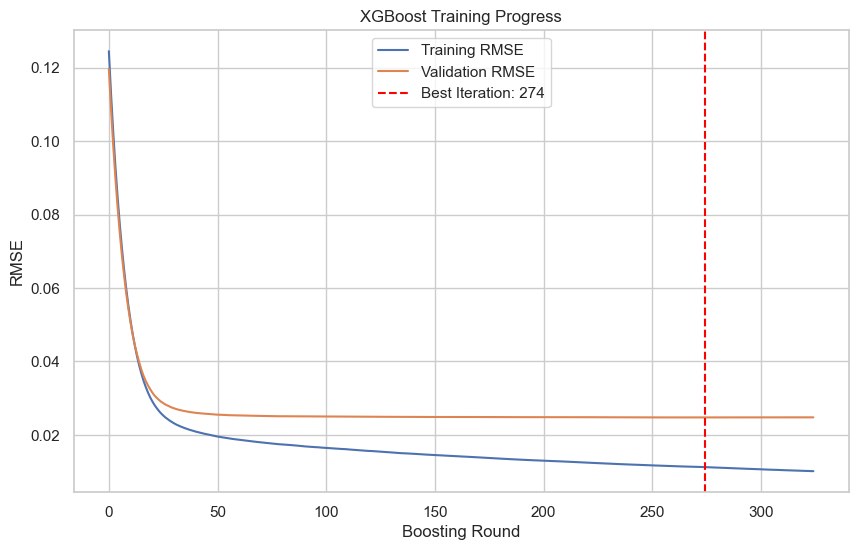

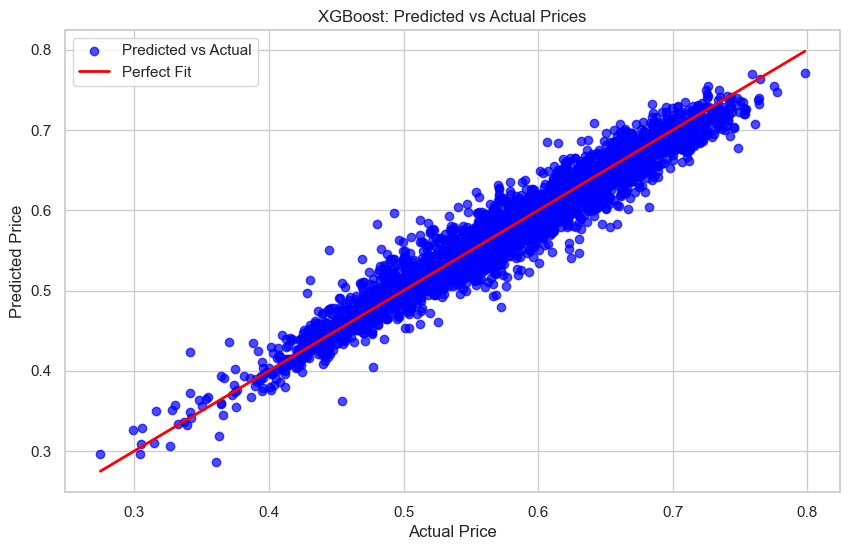

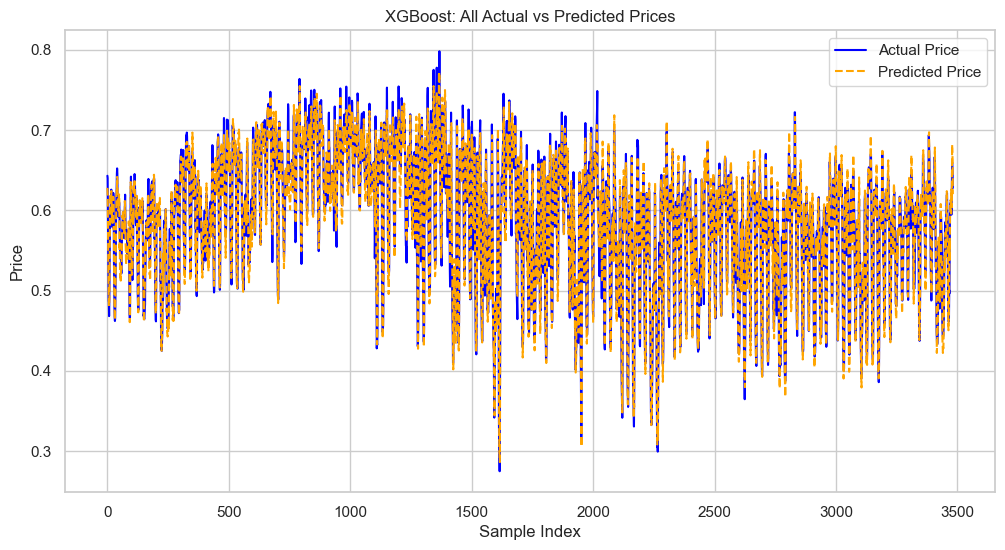

In [241]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb

# 1. Plotting the RMSE over boosting rounds
plt.figure(figsize=(10, 6))
plt.plot(train_rmse, label='Training RMSE')
plt.plot(val_rmse, label='Validation RMSE')
plt.axvline(x=xgb_model.best_iteration, color='red', linestyle='--', label=f'Best Iteration: {xgb_model.best_iteration}')
plt.legend()
plt.xlabel('Boosting Round')
plt.ylabel('RMSE')
plt.title('XGBoost Training Progress')
plt.show()

# 2. Scatter plot for Prediction vs Actual Price
predictions = xgb_model.predict(X_test_reshaped)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.7, color="blue", label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", lw=2, label="Perfect Fit")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("XGBoost: Predicted vs Actual Prices")
plt.legend()
plt.show()

# 3. Line plot for All Actual vs Predicted Prices
plt.figure(figsize=(12, 6))
plt.plot(y_test, linestyle='-', label="Actual Price", color="blue")
plt.plot(predictions, linestyle='--', label="Predicted Price", color="orange")
plt.xlabel("Sample Index")
plt.ylabel("Price")
plt.title("XGBoost: All Actual vs Predicted Prices")
plt.legend()
plt.show()


# Gammel

In [242]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Set up the parameter grid with sensible values
param_grid = {"max_depth": [5, 6, 8],
              "n_estimators": [1000, 1500],
              "learning_rate": [0.08, 0.1, 0.12]}

# Initialize the regressor
regressor = xgb.XGBRegressor(eval_metric='rmse', random_state=42)

# Perform GridSearchCV on the reshaped training set
search = GridSearchCV(
    regressor, param_grid, cv=3, scoring='neg_root_mean_squared_error'
)
search.fit(X_train_reshaped, y_train)  # Use reshaped training data

# Output the best hyperparameters
print("The best hyperparameters are ", search.best_params_)


KeyboardInterrupt: 

Early Stopping: Training stopped after 312 rounds out of 1000.

--- Evaluation Metrics ---
Mean Absolute Error (MAE): 0.015538568660407788
Mean Squared Error (MSE): 0.00042577282540649894
Root Mean Squared Error (RMSE): 0.020634263384150617
R-squared (R²): 0.9386

--- Overfitting Check ---
Difference between Training and Validation RMSE is significant. 0.00937831302080736 > 0.00246724015750313
Final Training RMSE: 0.0153
Final Validation RMSE: 0.0247
RMSE Difference: 0.0094


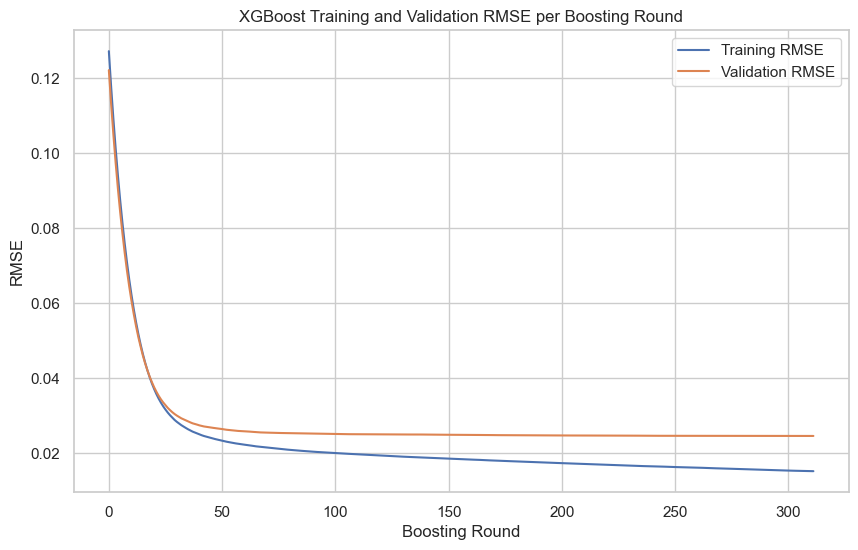

In [215]:
import xgboost as xgb
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Initialize the regressor with the best hyperparameters
params = {
    # "learning_rate": search.best_params_["learning_rate"],
    # "n_estimators": search.best_params_["n_estimators"],
    # "max_depth": search.best_params_["max_depth"],
    "learning_rate": 0.08,
    "n_estimators": 1000,
    "max_depth": 5,
    'min_child_weight': 1,
    'gamma': 0,
    'subsample': 1,
    'colsample_bytree': 1,
    'eval_metric': 'rmse',
    'random_state': 101,
    'early_stopping_rounds': 10
}

best_regressor = xgb.XGBRegressor(**params)

# Train the model with early stopping on reshaped data
best_regressor.fit(
    X_train_reshaped, y_train,
    eval_set=[(X_train_reshaped, y_train), (X_val_reshaped, y_val)],
    verbose=False
)

# Check if early stopping was triggered
training_rounds = len(best_regressor.evals_result()['validation_0']['rmse'])
if training_rounds < params['n_estimators']:
    print(f"Early Stopping: Training stopped after {training_rounds} rounds out of {params['n_estimators']}.")

# Make predictions on the reshaped test set
predictions = best_regressor.predict(X_test_reshaped)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Display evaluation metrics
print("\n--- Evaluation Metrics ---")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2:.4f}")

# Retrieve training and validation RMSE results
results = best_regressor.evals_result()
train_rmse_final = results['validation_0']['rmse'][-1]
val_rmse_final = results['validation_1']['rmse'][-1]
rmse_diff = abs(train_rmse_final - val_rmse_final)

# Check for overfitting
print("\n--- Overfitting Check ---")
if rmse_diff > 0.1 * val_rmse_final:
    print(f"Warning: Potential overfitting detected.\nDifference between Training and Validation RMSE is significant. {rmse_diff} > {0.1 * val_rmse_final}")
else:
    print("Good generalization: Training and Validation RMSE values are close.")

print(f"Final Training RMSE: {train_rmse_final:.4f}")
print(f"Final Validation RMSE: {val_rmse_final:.4f}")
print(f"RMSE Difference: {rmse_diff:.4f}")

# Plot training and validation RMSE
epochs = len(results['validation_0']['rmse'])
x_axis = range(0, epochs)

plt.figure(figsize=(10, 6))
plt.plot(x_axis, results['validation_0']['rmse'], label='Training RMSE')
plt.plot(x_axis, results['validation_1']['rmse'], label='Validation RMSE')
plt.legend()
plt.xlabel('Boosting Round')
plt.ylabel('RMSE')
plt.title('XGBoost Training and Validation RMSE per Boosting Round')
plt.show()


<Figure size 1000x800 with 0 Axes>

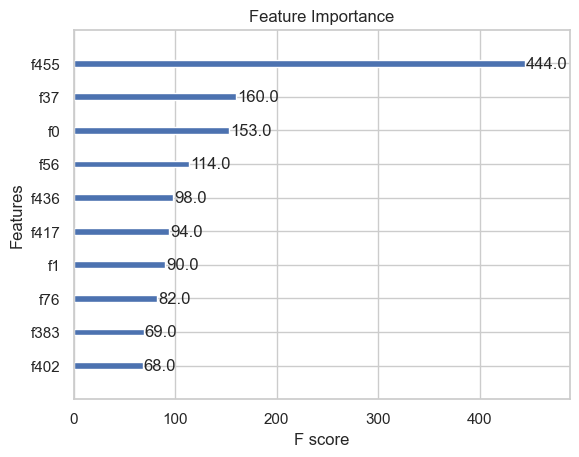

In [224]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

# Plot the feature importance
plt.figure(figsize=(10, 8))
plot_importance(best_regressor, max_num_features=10)  # Limit to the top 10 most important features
plt.title('Feature Importance')
plt.show()

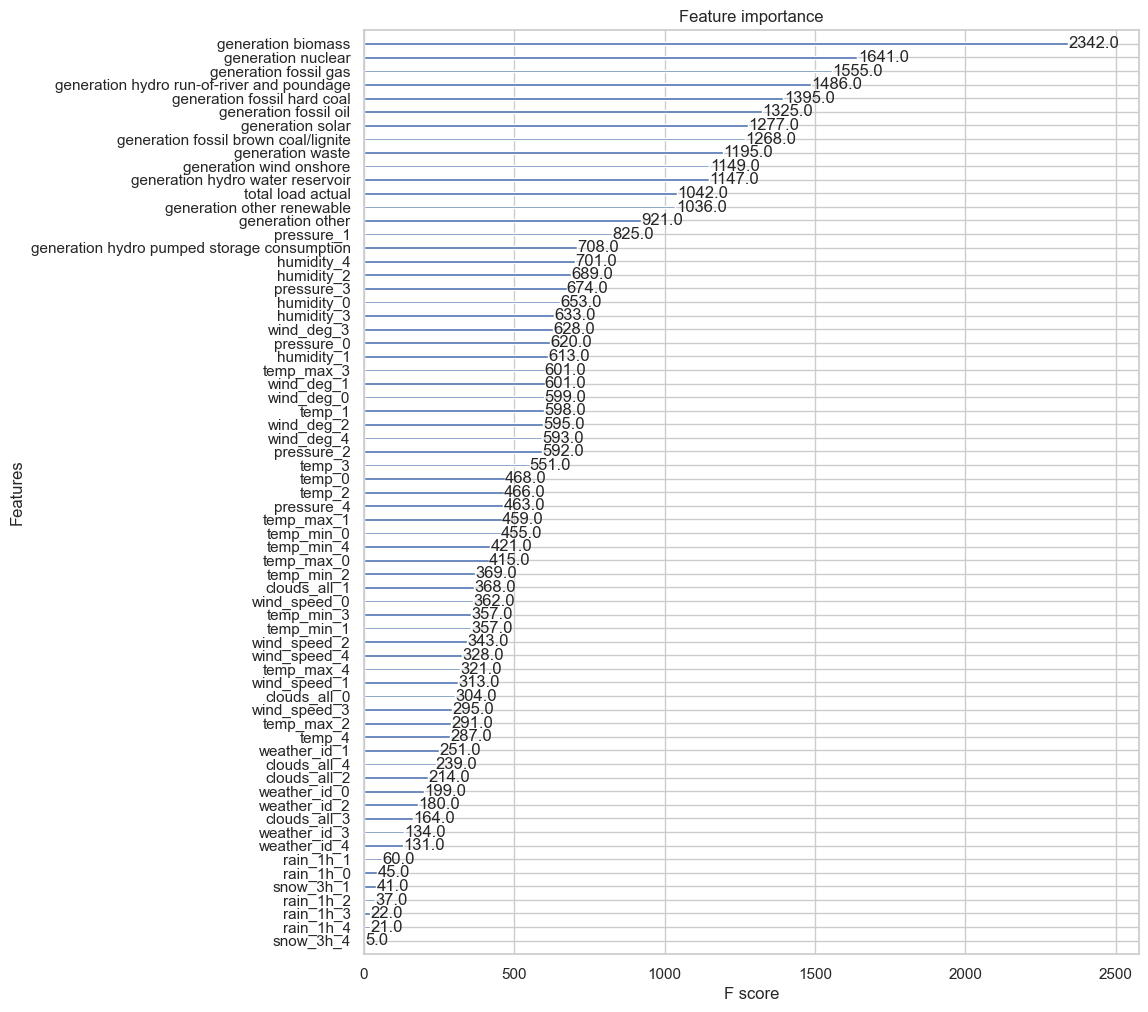

In [225]:
# Plot feature importance using the trained model from cell 16
fig, ax = plt.subplots(figsize=(10, 12))  # Adjust the width and height as needed
xgb.plot_importance(bst, ax=ax)
plt.show()